In [ ]:
import matplotlib
matplotlib.use('TkAgg')

from numpy import arange, sin, pi
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2TkAgg
# implement the default mpl key bindings
from matplotlib.backend_bases import key_press_handler


from matplotlib.figure import Figure

import sys
if sys.version_info[0] < 3:
    import Tkinter as Tk
else:
    import tkinter as Tk

root = Tk.Tk()
root.wm_title("Embedding in TK")


f = Figure(figsize=(5, 4), dpi=100)
a = f.add_subplot(111)
t = arange(0.0, 3.0, 0.01)
s = sin(2*pi*t)

a.plot(t, s)


# a tk.DrawingArea
canvas = FigureCanvasTkAgg(f, master=root)
canvas.show()
canvas.get_tk_widget().pack(side=Tk.TOP, fill=Tk.BOTH, expand=1)

toolbar = NavigationToolbar2TkAgg(canvas, root)
toolbar.update()
canvas._tkcanvas.pack(side=Tk.TOP, fill=Tk.BOTH, expand=1)


def on_key_event(event):
    print('you pressed %s' % event.key)
    key_press_handler(event, canvas, toolbar)

canvas.mpl_connect('key_press_event', on_key_event)


def _quit():
    root.quit()     # stops mainloop
    root.destroy()  # this is necessary on Windows to prevent
                    # Fatal Python Error: PyEval_RestoreThread: NULL tstate

button = Tk.Button(master=root, text='Quit', command=_quit)
button.pack(side=Tk.BOTTOM)

Tk.mainloop()
# If you put root.destroy() here, it will cause an error if
# the window is closed with the window manager.

In [ ]:
from Tkinter import *

master = Tk()

e = Entry(master)
e.pack()

e.focus_set()

def callback():
    print e.get()

b = Button(master, text="get", width=10, command=callback)
b.pack()

mainloop()
e = Entry(master, width=50)
e.pack()

text = e.get()
def makeentry(parent, caption, width=None, **options):
    Label(parent, text=caption).pack(side=LEFT)
    entry = Entry(parent, **options)
    if width:
        entry.config(width=width)
    entry.pack(side=LEFT)
    return entry

user = makeentry(parent, "User name:", 10)
password = makeentry(parent, "Password:", 10, show="*")
content = StringVar()
entry = Entry(parent, text=caption, textvariable=content)

text = content.get()
content.set(text)

In [3]:
import tkinter as tk

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 400, height = 300)
canvas1.pack()

aim =  tk.StringVar(value=10)

entry1 = tk.Entry (root, textvariable=aim) 
canvas1.create_window(200, 140, window=entry1)

def getSquareRoot ():  
    x1 = entry1.get()
    
    label1 = tk.Label(root, text= float(x1)**0.5)
    canvas1.create_window(200, 230, window=label1)
    
button1 = tk.Button(text='Get the Square Root', command=getSquareRoot)
canvas1.create_window(200, 180, window=button1)

root.mainloop()

In [4]:
import tkinter as tk

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 400, height = 300,  relief = 'raised')
canvas1.pack()

label1 = tk.Label(root, text='Calculate the Square Root')
label1.config(font=('helvetica', 14))
canvas1.create_window(200, 25, window=label1)

label2 = tk.Label(root, text='Type your Number:')
label2.config(font=('helvetica', 10))
canvas1.create_window(200, 100, window=label2)

aim = tk.IntVar(value=10)

entry1 = tk.Entry (root, textvariable=aim) 
#canvas1.create_window(200, 140, window=aim)

def getSquareRoot ():
    
    x1 = aim.get()    
    
    label3 = tk.Label(root, text= 'The Square Root of ' + x1 + ' is:',font=('helvetica', 10))
    canvas1.create_window(200, 210, window=label3)
    
    label4 = tk.Label(root, text= float(x1)**0.5,font=('helvetica', 10, 'bold'))
    canvas1.create_window(200, 230, window=label4)
    
button1 = tk.Button(text='Get the Square Root', command=getSquareRoot, bg='brown', fg='white', font=('helvetica', 9, 'bold'))
canvas1.create_window(200, 180, window=button1)

root.mainloop()

AttributeError: module 'tkinter' has no attribute 'FloatVar'

In [38]:
import tkinter as tk
class A:
    def __init__(self):
        self.freq = 10
        self.but = None
    def setup(self):
        mainframe = tk.Tk()

        # Create main frame shape
        mainframe.title("Press Controller and sensor readings")

        fq = tk.IntVar(value=self.freq)  # Value saved here for the frequency

        def frequency():
            """
            If the user want to change the frequency, this function will change the frequency configuration of the
            Press_controller class
            Returns:

            """
            print("before:", self.freq)
            self.freq = fq.get()
            print("after:", self.freq)

        # change the frequency according to user input
        tk.Entry(mainframe, textvariable=fq, width=10).grid(column=1, row=1)
        self.but = tk.Button(mainframe, text="Set Frequency", command=frequency).grid(column=2, row=1)

        mainframe.mainloop()

In [39]:
st=A()

In [40]:
st.setup()

before: 10
after: 10
before: 10
after: 10


In [47]:
mainframe = tk.Tk()
def run():
    print("Work")
but = tk.Button(mainframe, text="Set Frequency", command=run)

In [48]:
but.

Work


'None'

In [29]:
import tkinter as tk
master = tk.Tk()
#v = StringVar()
v = tk.IntVar(master = master)

def Entered(p1):
    print ('Got: ', Entry1.get())
    print ('Got: ', v.get())

Entry1 = tk.Entry(master, width = 25, textvariable = v) # No text now
Entry1.pack()
Entry1.bind('<Return>', Entered)
master.mainloop()

Got:  0
Got:  0
Got:  0.6
Got:  0


In [19]:
v.get()

'gjl'

In [22]:
a.get()

0

In [30]:
import matplotlib.pyplot as plt

In [32]:
plt.figure(figsize=(5))

TypeError: from_bounds() argument after * must be an iterable, not int

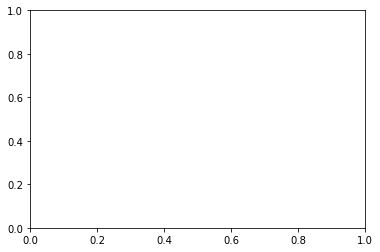

In [49]:
fig = plt.figure()
ax = plt.gca()

In [ ]:
fig.